In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
''''''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, i'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''ncluding without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

calibrating) step which adapts the parameters at hand (in this case, $g_n$) to the function $f_1$. This adaptive structure is generalized in Section 7.6.3.

The ARMS algorithm is useful when a precise analytical study of the density *f* is impossible, as, for instance, in the setup of generalized linear models. In fact, *f* (or $f_t$) needs to be computed in only a few points to initialize the algorithm, which thus does not require the search for "good" density *g* which approximates *f*. This feature should be contrasted to the cases of the independent Metropolis Hastings algorithm and of sufficiently fast random walks as in the case of [A.29].

**Example .13. Poisson logistic model.** For the generalized linear model in Example 2.26, consider a logit dependence between explanatory and dependent (observations) variables,

$Y_i | x_i \sim \mathcal{P}(\frac{exp(bx_i)}{1+exp(bx_i)}), \quad i=1,...,n$

which implies the restriction $\lambda_i < 1$ on the parameters of the Poisson distribution, $Y_i \sim \mathcal{P}(\lambda_i)$. When *b* has the prior distribution $\mathcal{N}(0, \tau^2)$, the posterior distribution

$\pi(b|x, y) \propto \frac{exp\{\sum_i y_i(bx_i)\}}{\prod_i (1+exp(bx_i))} exp\{-\sum_i \frac{e^{bx_i}}{1+e^{bx_i}}\} e^{-b^2/2\tau^2}$.

This posterior distribution $\pi(b|x)$ is not easy to simulate from and one can use the ARMS Metropolis-Hastings algorithm instead.

** Random Walks**

A natural approach for the practical construction of a Metropolis-Hastings algorithm is to take into account the value previously simulated to generate the following value; that is, to consider a local exploration of the neighborhood of the current value of the Markov chain. This idea is already used in algorithms such as the simulated annealing algorithm 4.19 and the stochastic gradient method given in (5.4).

Since the candidate *g* in algorithm [4.24] is allowed to depend on the current state $X^{(t)}$, a first choice to consider is to simulate $Y_t$ according to

$Y_t = X^{(t)} + \epsilon_t$,

where $\epsilon_t$ is a random perturbation with distribution *g*, independent of $X^{(t)}$. In terms of the algorithm [4.24], $q(y|x)$ is now of the form $g(y-x)$. The Markov chain associated with *q* is a random walk (see Example E).

| $\delta$ | 0.1 | 0.5 | 1.0 |
|---|---|---|---|
| Mean | 0.399 | -0.111 | 0.10 |
| Variance | 0.698 | 1.11 | 1.06 |

Table 7.2. Estimators of the mean and the variance of a normal distribution $\mathcal{N}(0,1)$ based on a sample obtained by a Metropolis-Hastings algorithm using a random walk on [-8, 8] (15,000 simulations).

The convergence results of Section 7.3.2 naturally apply in this particular case. Following Lemma 7.6, if *g* is positive in a neighborhood of 0, the chain $(X^{(t)})$ is *f*-irreducible and aperiodic, therefore ergodic. The most common distributions *g* in this setup are the uniform distributions on spheres centered at the origin or standard distributions like the normal and the Student's t distributions. All these distributions usually need to be scaled; we discuss this problem in Section 7.6. At this point, we note that the choice of a symmetric function *g* (that is, such that $g(-t) = g(t)$) leads to the following original expression of [4.24], as proposed by Metropolis et al. (1953).

**Algorithm A.29 - Random walk Metropolis-Hastings -**

Given $x^{(t)}$,

1. Generate $Y_t \sim g(|y - x^{(t)}|)$.

2. Take

$X^{(t+1)} = 
\begin{cases} 
Y_t, & \text{with probability } \min\{1, \frac{f(Y_t)}{f(x^{(t)})} \} \\
x^{(t)}, & \text{otherwise}
\end{cases}$   [A.29]

**Example .14. A random walk normal generator.** Hastings (1970) considers the generation of the normal distribution $\mathcal{N}(0,1)$ based on the uniform distribution on [-$\delta$, $\delta$]. The probability of acceptance is then $\rho(x^{(t)}, y_t) = \exp\{(x^{(t)^2} - y_t^2)/2\} \wedge 1$. Figure 7.4 describes three samples of 15,000 points produced by this method for $\delta = 0.1, 0.5,$ and 1. The corresponding estimates of the mean and variance are provided in Table 7.2. Figure 7.4 clearly shows the different speeds of convergence of the averages associated with these three values of $\delta$, with an increasing regularity (in $\delta$) of the corresponding histograms and a faster exploration of the support of *f*.

Despite its simplicity and its natural features, the random walk Metropolis-Hastings algorithm does not enjoy uniform ergodicity properties. Mengersen and Tweedie (1996) have shown that in the case where supp *f* = $\mathbb{R}$, this algorithm cannot produce a uniformly ergodic Markov chain on $\mathbb{R}$ (Problem 7.16). This is a rather unsurprising feature when considering the local character of ...

[-0.5554511772650286, -0.013322920811129402, 0.6007742186717151, 0.3513847369526988, 1.157675254077591, 1.157675254077591, 1.2859889636773263, 1.2655620056561023, 0.7832318099920681, 0.8825761432660604]


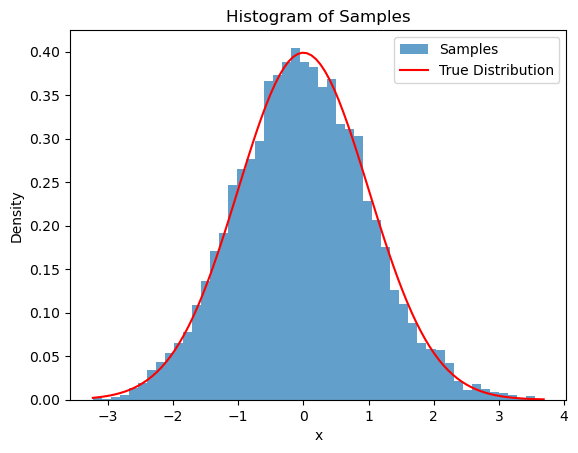

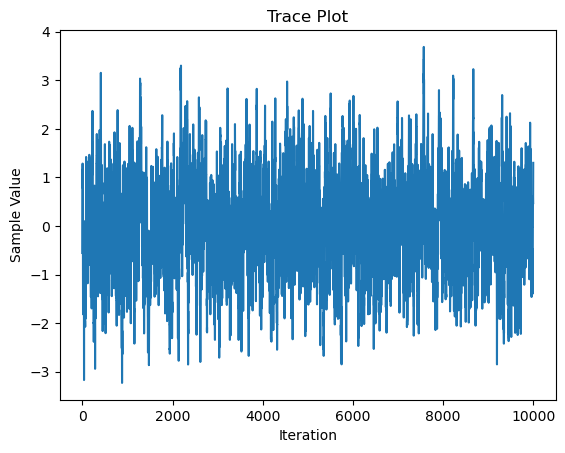

In [1]:
import random
import math

def random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in=0):
    """
    Implements the Random Walk Metropolis-Hastings algorithm.

    Args:
        f: The target density (unnormalized).
        g: The perturbation distribution (function, e.g., uniform).
        x_initial: The initial value for the chain.
        n_samples: The desired number of samples.
        delta: The scaling parameter for the perturbation distribution.
        burn_in: The number of initial samples to discard.

    Returns:
        A list of samples from the target distribution.
    """

    x_current = x_initial
    samples = []

    for _ in range(n_samples + burn_in):
        # 1. Generate Y_t ~ g(|y - x^(t)|)
        Y_t = x_current + g(delta)  # Perturb x_current

        # 2. Acceptance probability
        acceptance_ratio = f(Y_t) / f(x_current)
        if random.random() < min(1, acceptance_ratio):
            x_current = Y_t

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Example usage (replace with your actual functions and initial value)

def f(x):  # Example: Standard normal (unnormalized)
    return math.exp(-x**2 / 2)

def g(delta):  # Example: Uniform perturbation on [-delta, delta]
    return random.uniform(-delta, delta)

x_initial = 0
n_samples = 10000
delta = 1.0  # Adjust this scaling parameter
burn_in = 1000

samples = random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in)

# Analyze the samples (e.g., calculate mean, variance, etc.)
print(samples[:10])  # Print the first 10 samples
# ... (Add your analysis code here)


# Plotting (using matplotlib - install it if you don't have it: pip install matplotlib)
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True, alpha=0.7, label="Samples")

# If you know the true distribution, you can plot it for comparison:
import numpy as np
x = np.linspace(min(samples), max(samples), 100)
true_distribution = [math.exp(-val**2/2)/math.sqrt(2*math.pi) for val in x] #Normalized
plt.plot(x, true_distribution, 'r-', label="True Distribution")  # If f is unnormalized, normalize it
plt.title("Histogram of Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.plot(samples)
plt.title("Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Sample Value")
plt.show()

**Fig. 7.4.** Histograms of three samples produced by the algorithm [A.29] for a random walk on $[-\delta, \delta]$ with (a) $\delta = 0.1$, (b) $\delta = 0.5$, and (c) $\delta = 1.0$, with the convergence of the means (7.1), superimposed with scales on the right of the graphs (15,000 simulations).

the random walk proposal, centered at the current value of the Markov chain.

Although uniform ergodicity cannot be obtained with random walk Metropolis-Hastings algorithms, it is possible to derive necessary and sufficient conditions for geometric ergodicity. Mengersen and Tweedie (1996) have proposed a condition based on the log-concavity of *f* in the tails; that is, if there exist $\alpha > 0$ and $z_1$ such that

**(7.16)  $log f(x) - log f(y) \ge \alpha |y - x|$**

for $y < x < -z_1$ or $z_1 < x < y$.

**Theorem 7.15.** Consider a symmetric density *f* which is log-concave with associated constant $\alpha$ in (7.16) for |x| large enough. If the density *g* is positive and symmetric, the chain $(X^{(t)})$ of [A.29] is geometrically ergodic. If *f* is not symmetric, a sufficient condition for geometric ergodicity is that $g(t)$ be bounded by $b \exp\{-ct\}$ for a sufficiently large constant *b*.

The proof of this result is based on the use of the drift function $V(x) = \exp\{\alpha |x| / 2\}$ (see Note 6.9.1) and the verification of a geometric drift condition of the form

**(7.17)  $\Delta V(x) \le -\lambda V(x) + b \mathbb{I}_{[-x^*, x^*]}(x)$**

for a suitable bound $x^*$. Mengersen and Tweedie (1996) have shown, in addition, that this condition on *g* is also necessary in the sense that if $(X^{(t)})$ is geometrically ergodic, there exists $c > 0$ such that

**(7.18)  $\int \exp\{c|x|\} f(x) dx < \infty$.**

In [ ]:
import random
import math

def random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in=0):
    """
    Implements the Random Walk Metropolis-Hastings algorithm.

    Args:
        f: The target density (unnormalized).
        g: The perturbation distribution (function, e.g., uniform).
        x_initial: The initial value for the chain.
        n_samples: The desired number of samples.
        delta: The scaling parameter for the perturbation distribution.
        burn_in: The number of initial samples to discard.

    Returns:
        A list of samples from the target distribution.
    """

    x_current = x_initial
    samples = []

    for _ in range(n_samples + burn_in):
        # 1. Generate Y_t ~ g(|y - x^(t)|)
        Y_t = x_current + g(delta)  # Perturb x_current

        # 2. Acceptance probability
        acceptance_ratio = f(Y_t) / f(x_current)
        if random.random() < min(1, acceptance_ratio):
            x_current = Y_t

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Example usage (replace with your actual functions and initial value)

def f(x):  # Example: Standard normal (unnormalized)
    return math.exp(-x**2 / 2)

def g(delta):  # Example: Uniform perturbation on [-delta, delta]
    return random.uniform(-delta, delta)

x_initial = 0
n_samples = 10000
delta = 1.0  # Adjust this scaling parameter
burn_in = 1000

samples = random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in)

# Analyze the samples (e.g., calculate mean, variance, etc.)
print(samples[:10])  # Print the first 10 samples
# ... (Add your analysis code here)


# Plotting (using matplotlib - install it if you don't have it: pip install matplotlib)
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True, alpha=0.7, label="Samples")

# If you know the true distribution, you can plot it for comparison:
import numpy as np
x = np.linspace(min(samples), max(samples), 100)
true_distribution = [math.exp(-val**2/2)/math.sqrt(2*math.pi) for val in x] #Normalized
plt.plot(x, true_distribution, 'r-', label="True Distribution")  # If f is unnormalized, normalize it
plt.title("Histogram of Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.plot(samples)
plt.title("Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Sample Value")
plt.show()

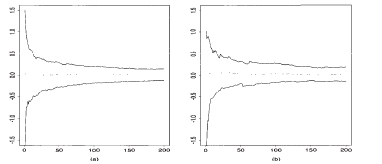

**(a)**

**(b)**

**Fig. 7.5.** 90% confidence envelopes of the means produced by the random walk Metropolis-Hastings algorithm [A.24] based on an instrumental distribution $\mathcal{N}(0,1)$ for the generation of (a) a normal distribution $\mathcal{N}(0,1)$ and (b) a distribution with density $\psi$. These envelopes are derived from 500 parallel independent chains and with identical uniform samples on both distributions.

**Example 7.16. A comparison of tail effects.** In order to assess the practical effect of this theorem, Mengersen and Tweedie (1996) considered two random walk Metropolis-Hastings algorithms based on a $\mathcal{N}(0,1)$ instrumental distribution for the generation of (a) a $\mathcal{N}(0,1)$ distribution and (b) a distribution with density $\psi(x) \propto (1+|x|)^{-3}$. Applying Theorem 7.15 (see Problem 7.18), it can be shown that the first chain associated is geometrically ergodic, whereas the second chain is not. Figures 7.5(a) and 7.5(b) represent the average behavior of the sums

$\frac{1}{T} \sum_{t=1}^{T} X^{(t)}$

over 500 chains initialized at $x^{(0)} = 0$. The 5% and 95% quantiles of these chains show a larger variability of the chain associated with the distribution $\psi$ in terms of both width of the confidence region and precision of the resulting estimators.

We next look at a discrete example where Algorithm [4.29] generates a geometrically ergodic chain.

**Example .17. Random walk geometric generation.** Consider generating a geometric distribution, $\mathcal{Geo}(\theta)$ using [4.29] with $(Y^{(1)})$ having transition probabilities $q(i,j) = \Gamma(Y^{(t+1)} - j | Y^{(t)} = i)$ given by ...

*The material used in the current example refers to the drift condition introduced in Note 6.9.1.*

$q(i, j) = 
\begin{cases} 
1/2, & i = j-1, j+1 \text{ and } j = 1, 2, 3, ... \\
1/2, & i = 0, 1 \text{ and } j = 0 \\
0, & \text{otherwise}
\end{cases}$

that is, *q* is the transition kernel of a symmetric random walk on the non-negative integers with reflecting boundary at 0.

Now, $X \sim \mathcal{Geo}(\theta)$ implies $P(X=x) = (1-\theta)^x \theta$ for $x = 0, 1, 2, ...$. The transition matrix $\overline{T}$ has a band and is given by

$\overline{T} = 
\begin{pmatrix} 
\frac{1+\theta}{2} & \frac{1-\theta}{2} & 0 & 0 & \cdots \\
\frac{1}{2} & \frac{1-\theta}{2} & \frac{1}{2} & 0 & \cdots \\
0 & \frac{1}{2} & \frac{1-\theta}{2} & \frac{1}{2} & \cdots \\
& \cdots & \cdots & \cdots & 
\end{pmatrix}$

Consider the potential function $V(i) = \beta^i$ where $\beta > 1$, and recall that $\Delta V(y^{(0)}) = \mathbb{E}[V(Y^{(1)})|y^{(0)}] - V(y^{(0)})$. For $i > 0$, we have

$\mathbb{E}[V(Y^{(1)})|Y^{(0)} = i] = \frac{1}{2} \beta^{i-1} + \frac{\theta}{2} \beta^i + \frac{1-\theta}{2} \beta^{i+1} = V(i) (\frac{1}{2\beta} + \frac{\theta}{2} + \frac{1-\theta}{2} \beta)$.

Thus, $\Delta V(i) = V(i) (\frac{1}{2\beta} + \frac{\theta}{2} + \frac{1-\theta}{2} \beta - 1) = V(i) g(\theta, \beta)$. For a fixed value of $\theta$, $g(\theta, \beta)$ is minimized by $\beta = \frac{1}{1-\theta}$. In this case, $\Delta V(i) = (\sqrt{1-\theta} + \frac{\theta}{2} - 1) V(i)$ and 

$\lambda = \sqrt{1-\theta} + \frac{\theta}{2} - 1$

is the geometric rate of convergence. The closer $\theta$ is to 1, the faster the convergence.

Tierney (1994) proposed a modification of the previous algorithm with a proposal density of the form $g(y - a - b(x-a))$; that is,

$y_t = a + b(x^{(t)} - a) + z_t$,

$z_t \sim g$.

This autoregressive representation can be seen as intermediary between the independent version ($b=0$) and the random walk version ($b=1$) of the Metropolis-Hastings algorithm. Moreover, when $b < 0$, $X^{(t)}$ and $X^{(t+1)}$ are negatively correlated, and this may allow for faster excursions on the surface of *f* if the symmetry point *a* is well chosen. Hastings (1970) also considers an alternative to the uniform distribution on $[x^{(t)} - \delta, x^{(t)} + \delta]$ (see Example 7.14) with the uniform distribution on $[-x^{(t)} - \delta, -x^{(t)} + \delta]$: convergence of the empirical average to 0 is then faster in this case, but the choice of 0 as center of symmetry is obviously crucial and requires some a priori information on the distribution *f*. In a general setting, *a* and *b* can be calibrated during the first iterations. (See also Problem 7.23.) (See also Chen and Schmeiser 1993, 1998 for the alternative "hit-and-run" algorithm, which proceeds by generating a random direction in the space and moves the current value by a random distance along this direction.)

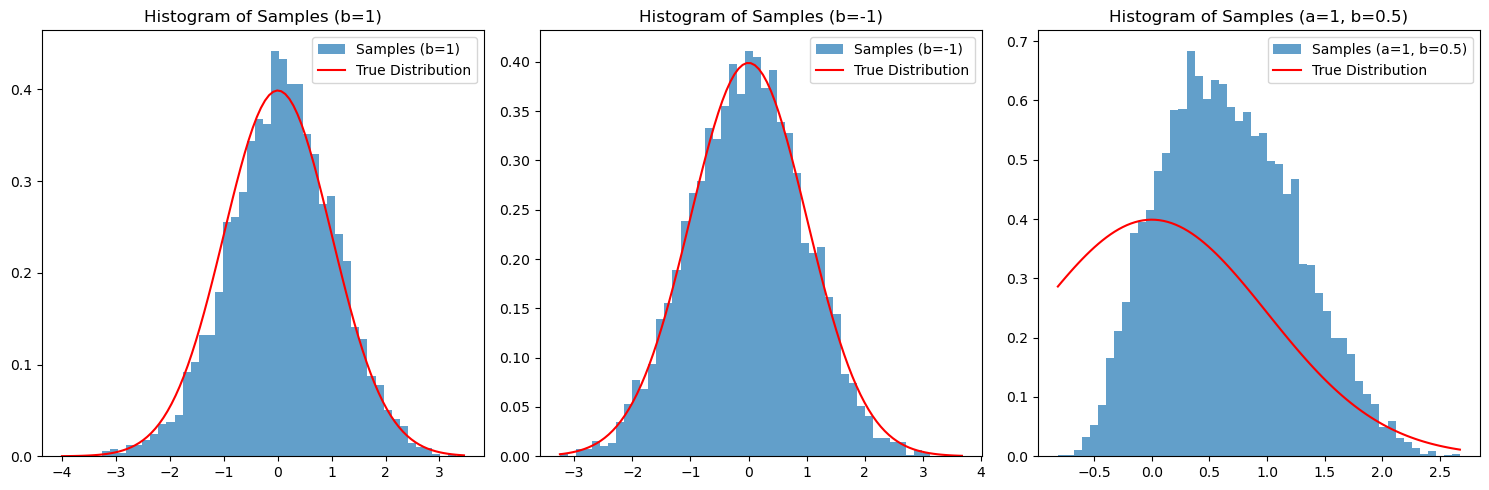

In [2]:
import random
import math

def random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in=0, a=None, b=None):
    """
    Implements the modified Random Walk Metropolis-Hastings algorithm with parameters a and b.

    Args:
        f: The target density (unnormalized).
        g: The perturbation distribution (function, e.g., uniform).
        x_initial: The initial value for the chain.
        n_samples: The desired number of samples.
        delta: The scaling parameter for the perturbation distribution.
        burn_in: The number of initial samples to discard.
        a: The location parameter (optional, defaults to None).
        b: The scaling parameter (optional, defaults to None).

    Returns:
        A list of samples from the target distribution.
    """

    x_current = x_initial
    samples = []

    if a is None:
      a = 0 # Default value if not provided

    if b is None:
      b = 1 # Default value if not provided


    for _ in range(n_samples + burn_in):
        # 1. Generate Y_t 
        Y_t = a + b * (x_current - a) + g(delta)  # Perturb x_current

        # 2. Acceptance probability
        acceptance_ratio = f(Y_t) / f(x_current)
        if random.random() < min(1, acceptance_ratio):
            x_current = Y_t

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Example usage (replace with your actual functions and initial value)

def f(x):  # Example: Standard normal (unnormalized)
    return math.exp(-x**2 / 2)

def g(delta):  # Example: Uniform perturbation on [-delta, delta]
    return random.uniform(-delta, delta)

x_initial = 0
n_samples = 10000
delta = 1.0  # Adjust this scaling parameter
burn_in = 1000

# Example with a=0, b=1 (standard random walk)
samples1 = random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in)

# Example with a=0, b=-1 (reflection)
samples2 = random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in, a=0, b=-1)

# Example with a=1, b=0.5 (different scaling and location)
samples3 = random_walk_metropolis_hastings(f, g, x_initial, n_samples, delta, burn_in, a=1, b=0.5)



# Plotting (using matplotlib - install it if you don't have it: pip install matplotlib)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5)) # Adjust figure size for multiple plots

# Plot for samples1 (standard random walk)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.hist(samples1, bins=50, density=True, alpha=0.7, label="Samples (b=1)")
x = np.linspace(min(samples1), max(samples1), 100)
true_distribution = [math.exp(-val**2/2)/math.sqrt(2*math.pi) for val in x] #Normalized
plt.plot(x, true_distribution, 'r-', label="True Distribution")
plt.title("Histogram of Samples (b=1)")
plt.legend()

# Plot for samples2 (reflection)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.hist(samples2, bins=50, density=True, alpha=0.7, label="Samples (b=-1)")
x = np.linspace(min(samples2), max(samples2), 100)
true_distribution = [math.exp(-val**2/2)/math.sqrt(2*math.pi) for val in x] #Normalized
plt.plot(x, true_distribution, 'r-', label="True Distribution")
plt.title("Histogram of Samples (b=-1)")
plt.legend()

# Plot for samples3 (different scaling and location)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.hist(samples3, bins=50, density=True, alpha=0.7, label="Samples (a=1, b=0.5)")
x = np.linspace(min(samples3), max(samples3), 100)
true_distribution = [math.exp(-val**2/2)/math.sqrt(2*math.pi) for val in x] #Normalized
plt.plot(x, true_distribution, 'r-', label="True Distribution")
plt.title("Histogram of Samples (a=1, b=0.5)")
plt.legend()


plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

### Optimization and Control

The previous sections have established the theoretical validity of the Metropolis-Hastings algorithms by showing that under suitable (and not very restrictive) conditions on the transition kernel, the chain produced by [A2] is ergodic and, therefore, that the mean (7.1) converges to the expectation \(\mathbb{E}_{f}[h(X)]\). In Sections 7.4 and 7.4, however, we showed that the most common algorithms only rarely enjoy strong ergodicity properties (geometric or uniform ergodicity). In particular, there are simple examples (see Problem 7.5) that show how slow convergence can be.

This section addresses the problem of choosing the transition kernel \(q(y|x)\) and illustrates a general acceleration method for Metropolis-Hastings algorithms, which extends the conditioning techniques presented in Section 4.2.

####  Optimizing the Acceptance Rate

When considering only the classes of algorithms described in Section 7.4, the most common alternatives are to use the following:

* (a) a fully automated algorithm like ARMS ([A28]);

* (b) an instrumental density $g$ which approximates $f$, such that $f/g$ is bounded for uniform ergodicity to apply to the algorithm [A25];

* (c) a random walk as in [A29].

In case (a), the automated feature of [A28] reduces "parameterization" to the choice of initial values, which are theoretically of limited influence on the efficiency of the algorithm. In both of the other cases, the choice of $g$ is much more critical, as it determines the performances of the resulting Metropolis-Hastings algorithm. As we will see below, the few pieces of advice available on the choice of $g$ are, in fact, contrary! Depending on the type of Metropolis-Hastings algorithm selected, one would want high acceptance rates in case (b) and low acceptance rates in case (c).

Consider, first, the independent Metropolis-Hastings algorithm introduced in Section 7.4. Its similarity with the Accept Reject algorithm suggests a choice of \(g\) that maximizes the average _acceptance rate_

$$
\rho = \mathbb{E}\left[\min_{Y}\left\{\frac{f(Y)\,g(X)}{f(X)\;g(Y)}\cdot 1 \right\}\right]
$$

$$
= 2P\left(\frac{f(Y)}{g(Y)} \geq \frac{f(X)}{g(X)}\right), \qquad X \sim f, \; Y \sim g,
$$

as seen in Lemma .9. In fact, the optimization associated with the choice of $g$ is related to the speed of convergence of $\frac{1}{f}\cdot\sum_{i=1}^{F}h(X^{(i)})$ to $\mathbb{E}_{f}[h(X)]$.

and, therefore, to the ability of the algorithm [4.25] to quickly explore any complexity of $f$ (see, for example, Theorem .8).

If this optimization is to be generic (that is, independent of $h$), $g$ should reproduce the density $f$ as faithfully as possible, which implies the maximization of $\rho$. For example, a density $g$ that is either much less or much more concentrated, compared with $f$, produces a ratio

$$
\frac{f(y)\;g(x)}{f(x)\;g(y)} \wedge 1
$$

having huge variations and, therefore, leads to a low acceptance rate.

The acceptance rate $\rho$ is typically impossible to compute, and one solution is to use the minorization result $\rho \geq 1/M$ of Lemma .9 to minimize $M$ as in the case of the Accept-Reject algorithm.

Alternatively, we can consider a more _empirical_ approach that consists of choosing a parameterized instrumental distribution $\rho(\cdot|\theta)$ and adjusting the corresponding parameters $\theta$ based on the evaluated acceptance rate, now $\rho(\theta)$; that is, first choose an initial value for the parameters, $\theta_{0}$, and estimate the corresponding acceptance rate, $\dot{\rho}(\theta_{0})$, based on \(m\) iterations of [4.25], then modify $\theta_{0}$ to obtain an increase in $\rho$.

In the simplest cases, $\theta_{0}$ will reduce to a scale parameter which is increased or decreased depending on the behavior of $\rho(\theta)$. In multidimensional settings, $\theta_{0}$ can also include a position parameter or a matrix acting as a scale parameter, which makes optimizing $\rho(\theta)$ a more complex task. Note that $\dot{\rho}(\theta)$ can be obtained by simply counting acceptances or through

$$
\frac{n}{m}\sum_{i=1}^{m}\mathbb{I}_{\{f(y_{i})g(z_{i}|0) \geq f(x_{i})\dot{\rho}(y_{i}|0)\}},
$$

where $x_{1},\ldots,x_{m}$ is a sample from $f$, obtained, for instance, from a first MCMC algorithm, and $y_{1},\ldots,y_{m}$ is an iid sample from $\rho(\cdot|\theta)$. Therefore, if $\theta$ is composed of location and scale parameters, a sample $(x_{1},y_{1}),\ldots,(x_{m},y_{m})$ corresponding to a value $\theta_{0}$ can be used repeatedly to evaluate different values of $\theta$ by a deterministic modification of $y_{i}$, which facilitates the maximization of $\rho(\theta)$.

**Example .18. Inverse Gaussian distribution.** The _inverse Gaussian distribution_ has the density

$$
f(z|\theta_{1},\theta_{2}) \propto z^{-3/2} \exp\left\{-\theta_{1}z - \frac{\theta_{2}}{z} + 2\sqrt{\theta_{1}\theta_{2}} + \log\sqrt{2\theta_{2}}\right\}
$$

# Metropolis-Hastings Algorithm Analysis

## Key Equations

The inverse Gaussian distribution analysis shows:

$$E[(Z,1/Z)] = \nabla(\theta_1, \theta_2) = \left(\frac{\theta_2}{\theta_1}, \frac{\theta_1}{\theta_2}, \frac{1}{2}\right)$$

For the Gamma distribution $G_n(\alpha,\beta)$ simulation in algorithm 4.26:

$$f(x) = x^{-\alpha-1/2} \exp\left\{(\beta-\theta_1)x - \frac{\theta_2}{2x}\right\}$$

The ratio $f/g$ is bounded for $\beta < \theta_1$. The value $x^*$ which maximizes this ratio is the solution of:

$$(\beta-\theta_1)x^2 - \left(\alpha + \frac{1}{2}\right)x + \theta_2 = 0$$

Which gives:

$$x_{\beta}^* = \frac{(\alpha+1/2) - \sqrt{(\alpha+1/2)^2 + 4\theta_2(\beta-\theta_1)}}{2(\beta-\theta_1)}$$

The analytical optimization of:

$$M(\beta) = (x_{\beta}^*)^{-\alpha-1/2} \exp\left\{(\beta-\theta_1)x_{\beta}^* - \frac{\theta_2}{x_{\beta}^*}\right\}$$

While not directly solvable, can be approximated numerically for given values of $\theta_1$ and $\theta_2$ with optimal value of $\beta^*$.

## Notes

- For $\theta_1 = 1.5$ and $\theta_2 = 2$, the theoretical constraint values for ratio $f/g$ show:
  - Theoretical value ≈ 1.155
  - Optimal value $\beta^* = 1.5$

The acceptance rate analysis requires careful consideration of the instrumental distribution's dependence on the current chain state.

# Metropolis-Hastings Algorithm: Empirical Means and Rao-Blackwellization

## Empirical Mean Formulation

The empirical mean of the Metropolis-Hastings algorithm can be written as:

$$\delta^{MH} = \frac{1}{T} \sum_{t=1}^T h(z^{(t)})$$

$$= \frac{1}{T} \sum_{t=1}^T \sum_{i=1}^n \frac{h}{n} 1_{y_i=z_t}$$

$$= \frac{1}{T} \sum_{t=1}^T h(y_i) \sum_{i=1}^n 1_{y_i=z_t}$$

## Conditional Expectation

The conditional expectation is given by:

$$\delta^{RB} = \frac{1}{T} \sum_{t=1}^T h(y_i) E\left[\sum_{i=1}^n 1_{X(t)=y_i}|y_1,...,y_T\right]$$

$$= \frac{1}{T} \sum_{t=1}^T h(y_i) P(X(t) = y_i|y_1,...,y_T)$$

## Rao-Blackwellization Theorem

For the weight ratios and probabilities:

$$w_{ij} = \frac{f(y_j)}{g(y_i)}, \quad p_{ij} = \frac{w_j}{w_i} \wedge 1 \quad (0 \leq i < j)$$

$$\zeta_{ii} = 1, \quad \zeta_{ij} = \prod_{k=i}^{j-1} (1-p_{ik}) \quad (i < j)$$

The estimator $\delta^{RB}$ can be written as:

$$\delta^{RB} = \frac{1}{T+1} \sum_{i=0}^T \varphi_i h(y_i)$$

where:

$$\varphi_i = \tau_i \sum_{j=i}^T \zeta_{ij}$$

and the conditional probability $\tau_i = P(X(t) = y_i|y_0,y_1,...,y_T)$ is given by:

$$\tau_0 = 1 \text{ and } \tau_i = -\sum_{k=0}^{i-1} \tau_k \zeta_{k(i-1)}p_{ki} \text{ for } i > 0$$

## Computational Complexity
The computation of $\zeta_{ij}$ for a fixed $i$ requires $(T-i)$ multiplications, and the overall computation of all $\zeta_{ij}$ requires $(T(T+1))/2$ multiplications.

# General Case Metropolis-Hastings Algorithm Analysis

## Key Definitions

For an arbitrary instrumental distribution $q(y|x)$, with $\rho_{ij}$ and $\zeta_{ij}$ defined as:

$$\rho_{ij} = \frac{f(y_j)/q(y_j|y_i)}{f(y_i)/q(y_i|y_j)} \wedge 1 \quad (j > i)$$

$$\tilde{\rho}_{ij} = \rho_{ij}q(y_j+1|y_j), \quad \varrho_{ij} = (1-\rho_{ij})q(y_j+1|y_i) \quad (i < j < T)$$

$$\zeta_{ii} = 1, \quad \zeta_{ij} = \prod_{k=j+1}^i \varrho_{ik} \quad (i < j < T)$$

The recursive equations for $\tau_i$ are:

$$\tau_0 = 1, \quad \tau_j = \sum_{i=0}^{j-1} \tau_i\zeta_{i(j-1)}\tilde{\rho}_{ij}, \quad \tau_j = \sum_{i=0}^{j-1} \tau_i\zeta_{i(j-1)}\rho_{ij} \quad (j < T)$$

And for weights:

$$\omega_i^1 = 1, \quad \omega_j^i = \omega_{j-1}^i + \varrho_{ij}\omega_{j-1}^{j-1} \quad (0 \leq j < i < T)$$

## Theorem 7.21

The estimator $\delta^{RB}$ is given by:

$$\delta^{RB} = \frac{\sum_{i=0}^T \varphi_i h(y_i)}{\sum_{i=0}^T \tau_i \zeta_{i(T-1)}}$$

where $(i < T)$:

$$\varphi_i = \tau_i \left[\sum_{j=i}^{T-1} \zeta_{ij}\tilde{\rho}_{j1} + \zeta_{i(T-1)}(1-\rho_{iT})\right]$$

and $\varphi_T = \tau_T$

## Performance Analysis

For simulations with random walk perturbations distributed as $C(0,\sigma^2)$:

- When $\sigma = 0.4$:
  - Improvement rate ≈ 8%
  - Quadratic risk shows better efficiency
  
- When $\sigma = 3.0$:
  - Improvement rate ≈ 1.5%
  - Higher quadratic risk

The computational complexity involves $T(T+1)/2$ multiplications for calculations of $\tilde{\rho}_{ij}$, $\varrho_{ij}$, $\zeta_{ij}$, $\tau_i$, and $\omega_j^i$.

In [5]:
import random
import math

def metropolis_hastings_inverse_gaussian(theta1, theta2, n_samples, burn_in=0):
    """
    Metropolis-Hastings for Inverse Gaussian distribution (no NumPy).

    Args:
        theta1: Parameter theta1 of the inverse Gaussian.
        theta2: Parameter theta2 of the inverse Gaussian.
        n_samples: Number of samples to generate.
        burn_in: Burn-in period.

    Returns:
        A list of samples from the inverse Gaussian distribution.
    """

    def f(x):  # Target distribution (unnormalized inverse Gaussian)
        if x <= 0:  # Enforce x > 0
            return 0.0
        return x**(-3/2) * math.exp(-(theta2 * (x - theta1)**2) / (2 * theta1**2 * x))

    def g(beta):  # Proposal distribution (Gamma - approximate without NumPy)
        alpha = theta2 / theta1
        # Approximation of Gamma sampling (replace with a better method if needed)
        # This is a VERY basic approximation and may not be suitable for all cases.
        # Consider using a more robust Gamma sampler if accuracy is critical.
        return sum(random.uniform(0, 1/beta) for _ in range(int(alpha)))  # Crude Gamma approximation

    def optimal_beta(theta1, theta2):
        """Finds the optimal beta numerically (using a basic search)."""
        # A more robust optimization method would be better if available.
        best_beta = 0
        best_m = float('-inf')
        for beta in [i/100.0 * theta1 for i in range(101)]:  # Basic search
            m_beta = m(beta)
            if m_beta > best_m:
                best_m = m_beta
                best_beta = beta
        return best_beta

    def m(beta):
        # Basic search for x_rho (replace with a better method if needed)
        best_x = 0
        best_objective = float('inf')
        for x in [i/100.0 * 10 for i in range(1001)]: # Search in [0, 10]
          objective = -((x**(-1/2)) * math.exp((beta - theta1) * x - theta2 / x))
          if objective < best_objective:
            best_objective = objective
            best_x = x
        x_rho = best_x
        return -(x_rho**(-1/2) * math.exp((beta - theta1) * x_rho - theta2 / x_rho))

    beta_star = optimal_beta(theta1, theta2)  # Find optimal beta
    print(f"Optimal beta: {beta_star}")

    samples = []
    x_current = 1.0  # Initial value (you might need to adjust this)

    for _ in range(n_samples + burn_in):
        y = g(beta_star)  # Generate from the Gamma proposal
        acceptance_ratio = f(y) / f(x_current)  # Calculate acceptance probability
        if random.random() < min(1, acceptance_ratio):
            x_current = y  # Accept the proposal

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Example usage:
theta1 = 1.5
theta2 = 2
n_samples = 5000
burn_in = 1000

samples = metropolis_hastings_inverse_gaussian(theta1, theta2, n_samples, burn_in)

# Analyze the samples (e.g., plot a histogram)
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True)
plt.title("Samples from Inverse Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

# Basic mean estimation (without NumPy)
mean_z = sum(samples) / len(samples)
mean_1_z = sum(1/x for x in samples) / len(samples)

print("Estimated E[Z]:", mean_z)
print("Estimated E[1/Z]:", mean_1_z)

ZeroDivisionError: 0.0 cannot be raised to a negative power

Optimal beta: 1.499994473977962


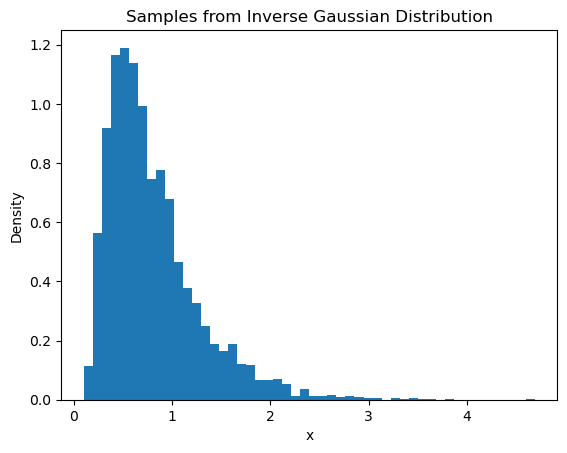

Estimated E[Z]: 0.8034650687988291
Estimated E[1/Z]: 1.6986411732883098


In [4]:
import random
import math
import numpy as np  # For numerical optimization (you can use other libraries)
from scipy.optimize import minimize_scalar


def metropolis_hastings_inverse_gaussian(theta1, theta2, n_samples, burn_in=0):
    """
    Metropolis-Hastings for Inverse Gaussian distribution.

    Args:
        theta1: Parameter theta1 of the inverse Gaussian.
        theta2: Parameter theta2 of the inverse Gaussian.
        n_samples: Number of samples to generate.
        burn_in: Burn-in period.

    Returns:
        A list of samples from the inverse Gaussian distribution.
    """

    def f(x):  # Target distribution (unnormalized inverse Gaussian)
        if x <= 0:  # Enforce x > 0
            return 0.0
        return x**(-3/2) * math.exp(-(theta2 * (x - theta1)**2) / (2 * theta1**2 * x))

    def g(beta):  # Proposal distribution (Gamma)
        alpha = theta2 / theta1
        return np.random.gamma(alpha, 1/beta)  # Scale parameter is 1/beta for numpy's gamma

    def optimal_beta(theta1, theta2):
        """Finds the optimal beta numerically."""

        def m(beta):
            def objective(x):
                return -((x**(-1/2)) * math.exp((beta - theta1) * x - theta2 / x)) # Negative for minimization

            result = minimize_scalar(objective, bounds=(0, 100), method='bounded') # Bound for x
            x_rho = result.x
            return -(x_rho**(-1/2) * math.exp((beta - theta1) * x_rho - theta2 / x_rho)) # Return negative of M(beta) for minimization

        result = minimize_scalar(m, bounds=(0, theta1), method='bounded') # Bound for beta
        return result.x

    beta_star = optimal_beta(theta1, theta2)  # Find optimal beta
    print(f"Optimal beta: {beta_star}")

    samples = []
    x_current = 1.0  # Initial value (you might need to adjust this)

    for _ in range(n_samples + burn_in):
        y = g(beta_star)  # Generate from the Gamma proposal
        acceptance_ratio = f(y) / f(x_current)  # Calculate acceptance probability
        if random.random() < min(1, acceptance_ratio):
            x_current = y  # Accept the proposal

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Example usage:
theta1 = 1.5
theta2 = 2
n_samples = 5000
burn_in = 1000

samples = metropolis_hastings_inverse_gaussian(theta1, theta2, n_samples, burn_in)

# Analyze the samples (e.g., plot a histogram)
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True)
plt.title("Samples from Inverse Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

print("Estimated E[Z]:", np.mean(samples))
print("Estimated E[1/Z]:", np.mean([1/x for x in samples]))

estimates of the means of 2 and 1/2 for $\theta_1 = 1.5$ and $\theta_2 = 2$. The constraint on the ratio *f//g* then imposes $\beta < 1.5$. The corresponding theoretical values are respectively 1.155 and 1.116, and the optimal value of $\beta$ is $\beta^* = 1.5$.

The random walk version of the Metropolis-Hastings algorithm, introduced in Section 7.5, requires a different approach to acceptance rates, given the dependence of the instrumental distribution on the current state of the chain. In fact, a high acceptance rate does not necessarily indicate that the algorithm is moving correctly since it may indicate that the random walk is moving too slowly on the surface of *f*. If $x^{(t)}$ and *y* are close, in the sense that $f(x^{(t)})$ and $f(y)$ are approximately equal, the algorithm [A.29] leads to the acceptance of *y* with probability

$\min(\frac{f(y)}{f(x^{(t)})}, 1) \approx 1$.

A higher acceptance rate may therefore correspond to a slower convergence as the moves on the support of *f* are more limited. In the particular case of multimodal densities whose modes are separated by zones of extremely small probability, the negative effect of limited moves on the surface of *f* clearly shows. While the acceptance rate is quite high for a distribution *g* with small variance, the probability of jumping from one mode to another may be arbitrarily small. This phenomenon occurs, for instance, in the case of mixtures of distributions (see Section 9.7.1) and in overparameterized models (see, e.g., Tanner and Wong 1987 and Besag et al. 1995). In contrast, if the average acceptance rate is low, the successive values of $f(x^{(t)})$ tend to be small compared with $f(x)$, which means that the random walk moves quickly on the surface of *f* since it often reaches the "borders" of the support of *f* (or, at least, that the random walk explores regions with low probability under *f*).

The above analysis seems to require an advanced knowledge of the density of interest, since an instrumental distribution *g* with too narrow a range will slow down the convergence rate of the algorithm. On the other hand, a distribution *g* with a wide range results in a waste of simulations of points outside the range of *f* without improving the probability of visiting all of the modes of *f*. It is unfortunate that an automated parameterization of *g* cannot guarantee uniformly optimal performances for the algorithm [A.29], and that the rules for choosing the rate presented in Note 7.8.4 are only heuristic.

**7.6.2 Conditioning and Accelerations**

Similar to the Accept Reject method, the Metropolis-Hastings algorithm does not take advantage of the total set of random variables that are generated. Lemma 7.9 shows that the "rate of waste" of these variables *y* is lower than for the Accept-Reject method, but it still seems inefficient to ignore the

This section presents material related to nonparametric Rao-Blackwellization, as in Section 4.2, and may be skipped on a first reading.

rejected $y_t$'s. As the rejection mechanism relies on an independent uniform random variable, it is reasonable to expect that the rejected variables bring, although indirectly, some relevant information on the distribution *f*. As in the conditioning method introduced in Section 4.2, the Rao-Blackwellization technique applies in the case of the Metropolis-Hastings algorithm. (Other approaches to Metropolis-Hastings acceleration can be found in Green and Han 1992, Gelfand and Sahu 1994, or McKeague and Wefelmeyer 2000.)

First, note that a sample produced by the Metropolis-Hastings algorithm, $(x^{(1)}, ..., x^{(T)})$, is based on two samples, $y_1, ..., y_T$ and $u_1, ..., u_T$ with $y_t \sim q(y|x^{(t-1)})$ and $u_t \sim \mathcal{U}_{[0,1]}$. The mean (7.1) can then be written

$\delta^{MH} = \frac{1}{T} \sum_{t=1}^{T} h(x^{(t)}) = \frac{1}{T} \sum_{t=1}^{T} \sum_{i=1}^{t} \mathbb{I}_{x^{(i)} = x^{(t)}} = \frac{1}{T} \sum_{t=1}^{T} h(y_t) \sum_{i=t}^{T} \mathbb{I}_{X^{(i)} = y_t}$

and the conditional expectation

$\delta^{RB} = \frac{1}{T} \sum_{t=1}^{T} h(y_t) \mathbb{E} [\sum_{i=t}^{T} \mathbb{I}_{X^{(i)} = y_t} | y_1, ..., y_T] = \frac{1}{T} \sum_{t=1}^{T} h(y_t) (\sum_{i=t}^{T} P(X^{(i)} = y_t | y_1, ..., y_T))$

dominates the empirical mean, $\delta^{MH}$, under quadratic loss. This is a consequence of the Rao-Blackwell Theorem (see Lehmann and Casella 1998, Section 1.7), resulting from the fact that $\delta^{RB}$ integrates out the variation due to the uniform sample.

The practical interest of this alternative to $\delta^{MH}$ is that the probabilities $P(X^{(i)} = y_t | y_1, ..., y_T)$ can be explicitly computed. Casella and Robert (1996) have established the two following results, which provide the weights for $h(y_t)$ in $\delta^{RB}$ both for the independent Metropolis-Hastings algorithm and the general Metropolis-Hastings algorithm. In both cases, the computational complexity of these weights is of order $\mathcal{O}(T^2)$, which is a manageable order of magnitude.

Consider first the case of the independent Metropolis-Hastings algorithm associated with the instrumental distribution *g*. For simplicity's sake, assume that $X^{(0)}$ is simulated according to the distribution of interest, *f*, so that the chain is stationary, and the mean (7.1) can be written

$\delta^{MH} = \frac{1}{T+1} \sum_{t=0}^{T} h(x^{(t)})$

with $x^{(0)} = y_0$. If we denote | n | 10 | 25 | 50 | 100 |
|---|---|---|---|---|
| $h_1$ | 50.11 | 49.39 | 48.27 | 46.68 |
| $h_2$ | 42.20 | 44.75 | 45.44 | 44.57 |

Table .4. Decrease (in percentage) of squared error risk associated with $\delta^{RB}$ for the evaluation of $\mathbb{E}[h_i(X)]$, evaluated over 7500 simulations for different sample sizes n. (Source: Casella and Robert 1996).

$w_i = \frac{f(y_i)}{g(y_i)}$, $\rho_{ij} = \frac{w_j}{w_i} \wedge 1$, $(0 \le i < j)$,

$\zeta_{ij} = \prod_{t=i+1}^{j} (1 - \mu_{tt})$, $(i < j)$,

$\zeta_{ii} = 1$,

we have the following theorem, whose proof is left to Problem 7.31.

**Theorem .19.** The estimator $\delta^{RB}$ can be written

$\delta^{RB} = \frac{1}{T+1} \sum_{i=0}^{T} \varphi_i h(y_i)$,

where

$\varphi_i = \tau_i \sum_{j=i}^{T} \zeta_{ij}$,

and the conditional probability $\tau_i = P(X^{(i)} = y_i | y_0, y_1, ..., y_T)$, $i = 0, ..., T$, is given by $\tau_0 = 1$ and $\tau_i = \tau_{i-1} - \sum_{j=0}^{i-1} \tau_j \zeta_{j(i-1)} \rho_{ji}$ for $i > 0$.

The computation of $\zeta_{ij}$ for a fixed i requires $(T-i)$ multiplications since $\zeta_{i(j+1)} = \zeta_{ij}(1 - \rho_{i(j+1)})$; therefore, the computation of all the $\zeta_{ij}$ require $T(T+1)/2$ multiplications. The derivations of $\tau_i$ and $\varphi_i$ are of the same order of complexity.

**Example .20. Rao-Blackwellization improvement for a $\mathcal{T}_3$ simulation.** Suppose the target distribution is $\mathcal{T}_3$ and the instrumental distribution is Cauchy, $\mathcal{C}(0,1)$. The ratio *f//g* is bounded, which ensures a geometric rate of convergence for the associated Metropolis-Hastings algorithm. Table 7.4 illustrates the improvement brought by $\delta^{RB}$ for some functions of interest $h_1(x) = x$ and $h_2(x) = \mathbb{I}_{(1.96, +\infty)}(x)$, whose (exact) expectations $\mathbb{E}[h_i(X)]$ $(i=1,2)$ are 0 and 0.07, respectively. Over the different sample sizes selected for the experiment, the improvement in mean square error brought by $\delta^{RB}$ is of the order 50%.

In [ ]:
import random
import math

def rao_blackwellized_estimator(f, g, h, x_initial, n_samples, burn_in=0):
    """
    Implements the Rao-Blackwellized estimator for Metropolis-Hastings.

    Args:
        f: The target density (unnormalized).
        g: The instrumental/proposal density.
        h: The function of interest (h(x)).
        x_initial: The initial value for the chain.
        n_samples: The desired number of samples.
        burn_in: The number of initial samples to discard.

    Returns:
        The Rao-Blackwellized estimate of E[h(X)].
    """

    x_current = x_initial
    y_samples = []  # Store the proposed y values
    x_samples = [] # Store the accepted x values
    w_values = []  # Store the weights w_i

    for _ in range(n_samples + burn_in):
        # Standard Metropolis-Hastings step
        y_proposed = x_current + g()  # Generate a proposal y
        acceptance_ratio = f(y_proposed) / f(x_current)
        if random.random() < min(1, acceptance_ratio):
            x_current = y_proposed
            x_samples.append(x_current)

        y_samples.append(y_proposed)  # Store proposed y, regardless of acceptance

        if _ >= burn_in:
            w_values.append(f(y_proposed) / g())  # Calculate and store w_i = f(y_i)/g(y_i)

    # Calculate zeta and tau (using the simplified formulas from the text)
    n = len(y_samples)
    zeta = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        zeta[i][i] = 1.0
        for j in range(i + 1, n):
            rho = min(w_values[j] / w_values[i], 1)
            zeta[i][j] = zeta[i][j - 1] * (1 - rho)

    tau = [0.0] * n
    tau[0] = 1.0
    for i in range(1, n):
        tau[i] = tau[i - 1]
        for j in range(i):
            rho = min(w_values[i] / w_values[j], 1) # Corrected index here
            tau[i] -= tau[j] * zeta[j][i - 1] * rho

    # Calculate phi
    phi = [0.0] * n
    for i in range(n):
        for j in range(i, n):
            phi[i] += tau[i] * zeta[i][j]

    # Calculate the Rao-Blackwellized estimator
    rao_blackwell_estimate = 0.0
    for i in range(n):
        rao_blackwell_estimate += phi[i] * h(y_samples[i])

    rao_blackwell_estimate /= (n) # Divide by total number of samples

    return rao_blackwell_estimate


# Example usage (replace with your actual functions)
def f(x):  # Example: Standard normal (unnormalized)
    return math.exp(-x**2 / 2)

def g():  # Example: Standard normal proposal distribution (you might need to adjust the scale)
    return random.gauss(0, 1)  # Returns a random float x where x ~ N(0,1)

def h(x):  # Example: h(x) = x (for estimating the mean)
    return x

x_initial = 0
n_samples = 10000
burn_in = 1000

estimate = rao_blackwellized_estimator(f, g, h, x_initial, n_samples, burn_in)
print("Rao-Blackwellized Estimate:", estimate)



# For comparison, here's the standard Metropolis-Hastings estimator:
def standard_metropolis_hastings(f, g, x_initial, n_samples, burn_in=0):
    x_current = x_initial
    samples = []
    for _ in range(n_samples + burn_in):
        y_proposed = x_current + g()
        acceptance_ratio = f(y_proposed) / f(x_current)
        if random.random() < min(1, acceptance_ratio):
            x_current = y_proposed
        if _ >= burn_in:
            samples.append(x_current)
    return sum(samples) / len(samples) # average of samples

standard_estimate = standard_metropolis_hastings(f, g, x_initial, n_samples, burn_in)
print("Standard Metropolis-Hastings Estimate:", standard_estimate)